In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
df = pd.read_csv("Iris.csv") 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
X = df.drop(["Id", "Species"], axis=1)   # Features
y = df["Species"]                        # Target


In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)

In [21]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

 Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


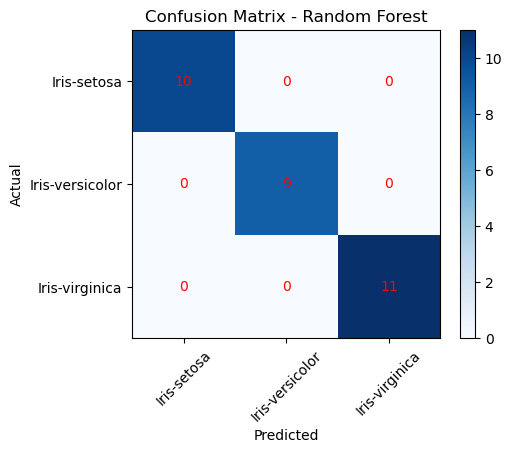

In [23]:
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(range(len(le.classes_)), le.classes_)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # SepalLength, SepalWidth, PetalLength, PetalWidth
prediction = rf_model.predict(sample)
print("🌸 Predicted Species:", le.inverse_transform(prediction)[0])



🌸 Predicted Species: Iris-setosa


C:\Users\RADHIKA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
importances = rf_model.feature_importances_
features = X.columns

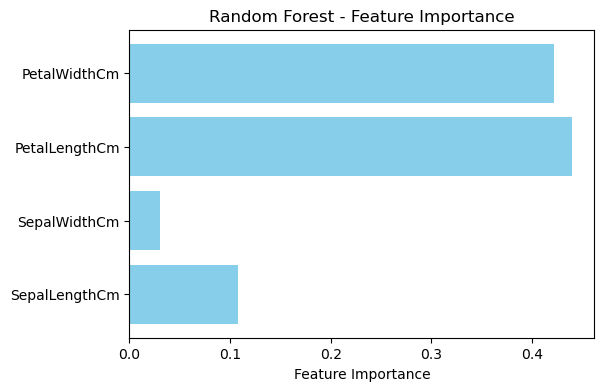

In [27]:
plt.figure(figsize=(6,4))
plt.barh(range(len(importances)), importances, align="center", color="skyblue")
plt.yticks(range(len(importances)), features)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()